In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

housing = pd.read_csv("../data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [12]:
import pandas as pd
import numpy as np
# 릿지라쏘회귀
import matplotlib.pyplot as plt
#기본추가 - 전처리:표준화
from sklearn.preprocessing import StandardScaler
# 테스트 집합 분류
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
# 회귀분석 모듈
from sklearn.linear_model import LogisticRegression
#나이브+소프트벡터
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# 의사결정나무
from sklearn.tree import DecisionTreeClassifier
# 앙상블
from sklearn.ensemble import VotingClassifier

In [15]:
housing.info()
# 누락된값 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [16]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [18]:
housing.hist(bins=50, figsize(20,15))
plt.show()

SyntaxError: positional argument follows keyword argument (<ipython-input-18-8dca0159388b>, line 1)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

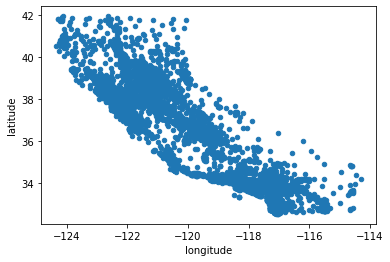

In [22]:
# 데이터 시각화
X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']

housing.plot(kind='scatter',x='longitude', y='latitude')


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

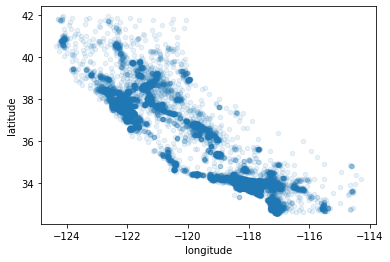

In [23]:
housing.plot(kind='scatter',x='longitude', y='latitude', alpha=0.1)

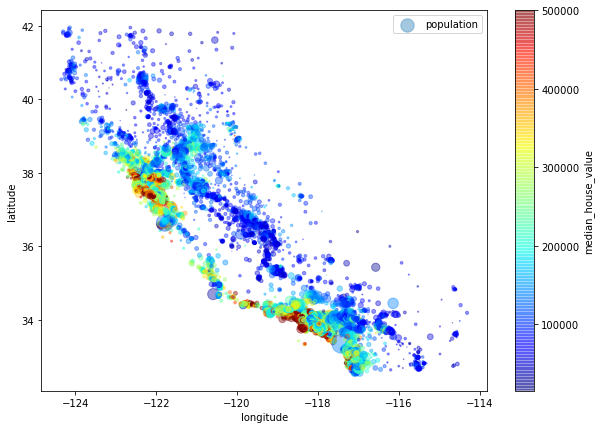

In [35]:
housing.plot(kind='scatter',x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100,label='population',figsize=(10,7),
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True, sharex=False
)
plt.legend()





In [37]:
#종속변수&독립변수 구분
housing = housing.dropna()
housing_input = housing.drop('median_house_value',axis=1)
housing_labels =housing['median_house_value']

In [41]:
# 표준화
from sklearn.preprocessing import StandardScaler

housing_num = housing_input.drop(['ocean_proximity'],axis=1)

scaler = StandardScaler()
housing_num = pd.DataFrame(scaler.fit_transform(housing_num))
housing_num.columns = [['longitude','latitude','housing_median_age',
                        'total_rooms','total_bedrooms','population','households','median_income']]
housing_num.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04,2.043300e+04
mean,-3.337466e-15,6.980827e-16,-7.584704e-16,2.192776e-16,2.035816e-16,-2.316367e-16,1.299940e-16,3.776866e-16
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-2.385447e+00,-1.447937e+00,-2.194584e+00,-1.205604e+00,-1.274093e+00,-1.254828e+00,-1.303810e+00,-1.775054e+00
25%,-1.112692e+00,-7.972780e-01,-8.444662e-01,-5.429688e-01,-5.740034e-01,-5.629702e-01,-5.739976e-01,-6.884113e-01
50%,5.393926e-01,-6.428050e-01,2.913923e-02,-2.331597e-01,-2.441308e-01,-2.285134e-01,-2.365573e-01,-1.762077e-01
75%,7.789699e-01,9.768213e-01,6.644886e-01,2.317829e-01,2.589843e-01,2.621409e-01,2.735268e-01,4.595713e-01
max,2.625711e+00,2.956885e+00,1.855769e+00,1.678713e+01,1.401871e+01,3.023088e+01,1.460297e+01,5.859665e+00


In [61]:
# 테스트 집합 나누기
from sklearn.model_selection import train_test_split 

train_input, test_input, train_labels, test_labels = train_test_split(housing_num, housing_labels, test_size=0.2)


In [44]:
# 라쏘
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(train_input, train_labels)

Lasso(alpha=1)

In [62]:
from regressors import stats

stats.summary(lasso_reg, train_input, train_labels)

ModuleNotFoundError: No module named 'regressors'

In [49]:
# 그리드 탐색 수행
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'alpha' : [1e-10,1e-4,1e-2,0.1,0.3,0.5,0.7,0.9,1,5,10,20]}
]
lasso_reg = Lasso()

grid_search = GridSearchCV(
    lasso_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True
)

grid_search.fit(train_input,train_labels)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157980164172.64062, tolerance: 17284842398.697296
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 407677114994.375, tolerance: 17332042249.74626
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid=[{'alpha': [1e-10, 0.0001, 0.01, 0.1, 0.3, 0.5, 0.7,
                                    0.9, 1, 5, 10, 20]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid_search.best_params_


{'alpha': 20}

In [52]:
# 20인지 재확인

cvres= grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(-mean_score),params)

70268.29777491454 {'alpha': 1e-10}
70268.2977713129 {'alpha': 0.0001}
70268.29741616492 {'alpha': 0.01}
70268.29419062196 {'alpha': 0.1}
70268.28703811031 {'alpha': 0.3}
70268.27994501471 {'alpha': 0.5}
70268.27292140185 {'alpha': 0.7}
70268.26585768927 {'alpha': 0.9}
70268.26237379892 {'alpha': 1}
70268.13132432562 {'alpha': 5}
70267.99053597484 {'alpha': 10}
70267.78784198232 {'alpha': 20}


In [53]:
lasso_reg = Lasso(alpha=20)
lasso_reg.fit(train_input, train_labels)

Lasso(alpha=20)

In [54]:
y_lasso = lasso_reg.predict(test_input)

In [63]:
# 릿지-랜덤탐색
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge

param_dist = {'alpha' : loguniform(1e-4,1e4)}

ridge_reg = Ridge()

n_iter_search = 50
random_search = RandomizedSearchCV(ridge_reg,
                                  param_distributions=param_dist,
                                  n_iter=n_iter_search,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True
                                  )

random_search.fit(train_input, train_labels)

RandomizedSearchCV(estimator=Ridge(), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fcb2166bfd0>},
                   return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
random_search.best_params_


{'alpha': 10.99976272012627}

In [65]:
ridge_ref = Ridge(alpha = random_search.best_params_['alpha'])
ridge_reg.fit(train_input, train_labels)
y_ridge = ridge_reg.predict(test_input)

In [66]:
# 엘라스틱 넷
import scipy.stats as stats
from sklearn.utils.fixes import loguniform
from sklearn.linear_model import ElasticNet

param_dist = {'l1_ratio':stats.uniform(0,1),
             'alpha': loguniform(1e-4,20)}

elastic_net = ElasticNet()

n_iter_search = 50
random_search = RandomizedSearchCV(elastic_net
                                  param_distributions=param_dist,
                                  n_iter=n_iter_search,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True
                                  )

random_search.fit(train_input, train_labels)

SyntaxError: invalid syntax (<ipython-input-66-569515070f5a>, line 13)